# https://www.kaggle.com/datasets/priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

1. Load the Dataset: Read the dataset using pandas.

In [24]:
df_path = Path('../../DATASETS/bitcoin_2010-07-17_2024-06-28.csv')
df = pd.read_csv(df_path)

2. Basic Statistics: Calculate basic statistics (mean, median, std) for each column.

In [25]:
df_float = df.select_dtypes(include=['float'])
float_numbers = df_float.mean()
median_number = df_float.median()
std_number = df_float.std()

3. Data Cleaning: Check for and handle any missing values.

In [26]:
df.isnull().sum().sum()

0

4. Data Types: Convert date columns to datetime type.

In [27]:
df['Start'] = pd.to_datetime(df['Start']).dt.date
df['End'] = pd.to_datetime(df['End']).dt.date

5. Feature Selection: Select the columns you want to use for analysis.

In [28]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

6. Data Splitting: Split the data into training and testing sets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

7. Normalization: Normalize the features using MinMaxScaler.

In [31]:
min_max_scaler = MinMaxScaler()
data_normalization = min_max_scaler.fit_transform(df_float)

8. Standardization: Standardize the features using StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

9. Linear Regression: Fit a linear regression model to predict the closing price.

In [39]:
regression_model = LinearRegression()

In [40]:
regresion_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regresion_model.predict(X_test)
y_pred

array([51210.12721094,   349.60083464, 44278.97764062, ...,
         241.84979886,   357.27661902, 39396.02588743])

10. Model Evaluation: Evaluate the linear regression model using Mean Squared Error (MSE).

In [44]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

120.04104931072072

In [45]:
MSE = mean_squared_error(y_test, y_pred)
MSE

81419.23172916533

In [46]:
RMSE = np.sqrt(MSE)
MSE

81419.23172916533

11. Plotting: Plot the predicted vs actual closing prices.

Text(0.5, 1.0, 'Actual vs Predicted Closing Price')

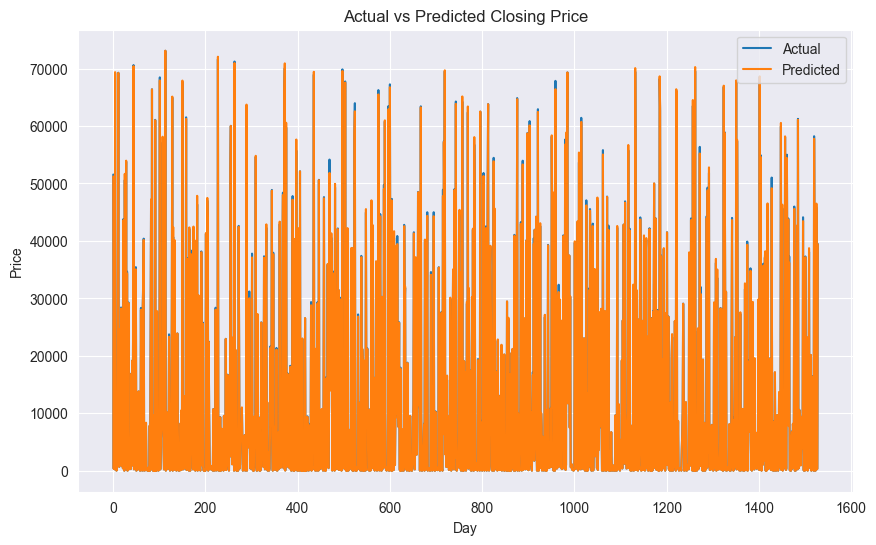

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Actual vs Predicted Closing Price')


12. Train/Test Split: Use different train/test splits and evaluate the performance.

In [55]:
def evaluate_model(split_ratio, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=None)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return MAE, MSE, RMSE



In [60]:
splits = [0.3, 0.2, 0.1]

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=None)  # Ensure random_state
    # is varied or not set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(f"Split {1-split}:{split} - MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Split 0.7:0.3 - MAE: 120.04104931072072, MSE: 81419.23172916533, RMSE: 285.3405539511784
Split 0.8:0.2 - MAE: 123.76175657575352, MSE: 86909.53343412599, RMSE: 294.8042289963392
Split 0.9:0.1 - MAE: 120.22810603566585, MSE: 89123.98128549442, RMSE: 298.5363985940314
